In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ML_utils import load_data,load_data_test_set, total_day_eve_night_grouping
df =pd.read_csv('train.csv')

### UNCOMMENT THIS PART TO GROUP FEATURES
feature_engineering = True
exclude_list = ['state','area_code']
one_hot_on = True
normalize_on = True
df=total_day_eve_night_grouping(df,grouping=feature_engineering)

###################
#### LOAD DATA ####

X_train,y_train,X_val,y_val,X_test,y_test = load_data(df,exclude=exclude_list,one_hot=one_hot_on,normalize_=normalize_on)


###################

X_train.shape


(2975, 11)

In [158]:
from ML_training import grid_search
model_list=[[X_train.shape[1],64,64,1]]
lr_list = [0.03,0.04,0.05]
alpha_list = [0.1]
threshold_list = [0.5]
epoch_list= [15000]

results=grid_search(X_train,y_train,X_val,y_val,model_list,lr_list,alpha_list,threshold_list,epoch_list)

import pickle

with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)

Epoch 0 : Loss 0.593096145857516
Train Accuracy: 0.19361344537815126
Validation Loss: 0.5768207677170764
Validation Accuracy: 0.21350078492935637
Epoch 1000 : Loss 0.07150691836948417
Train Accuracy: 0.9085714285714286
Validation Loss: 0.0689926092265854
Validation Accuracy: 0.9042386185243328
Epoch 2000 : Loss 0.05972939009073869
Train Accuracy: 0.9223529411764706
Validation Loss: 0.058933936823514645
Validation Accuracy: 0.9246467817896389
Epoch 3000 : Loss 0.05316493654475467
Train Accuracy: 0.935126050420168
Validation Loss: 0.05368893012329226
Validation Accuracy: 0.9340659340659341
Epoch 4000 : Loss 0.048748421870961435
Train Accuracy: 0.9411764705882353
Validation Loss: 0.05059913403247829
Validation Accuracy: 0.9372056514913658
Epoch 5000 : Loss 0.04553133824088439
Train Accuracy: 0.9489075630252101
Validation Loss: 0.048292004472021
Validation Accuracy: 0.9403453689167975
Epoch 6000 : Loss 0.04297578369107308
Train Accuracy: 0.9512605042016806
Validation Loss: 0.04660668982642

In [159]:
import pickle 

with open('results.pkl', 'rb') as f:
    results = pickle.load(f)
    

In [160]:
from ML_training import forward_propagation,accuracy

W_best = results['W_best']
b_best = results['b_best']
best_threshold = results['best_threshold']
y_pred=forward_propagation(X_test,W_best,b_best)[-1]
print(f"Test accuracy: {accuracy(y_test,y_pred,best_threshold)}")

Test accuracy: 0.9341692789968652


Model 1:
Model values: {'model': [11, 64, 64, 1], 'lr': 0.03, 'alpha': 0.1, 'epoch': 15000, 'threshold': 0.5}


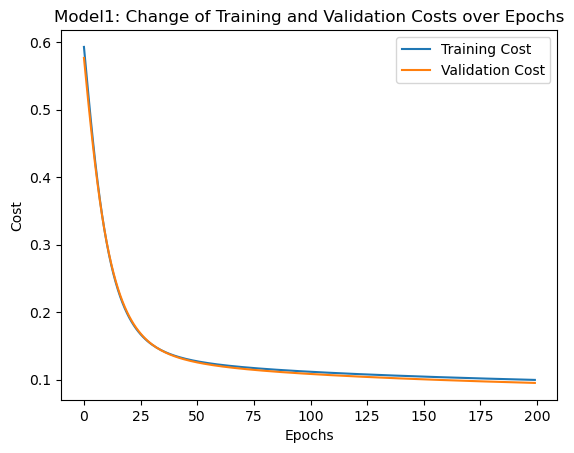

Model 2:
Model values: {'model': [11, 64, 64, 1], 'lr': 0.04, 'alpha': 0.1, 'epoch': 15000, 'threshold': 0.5}


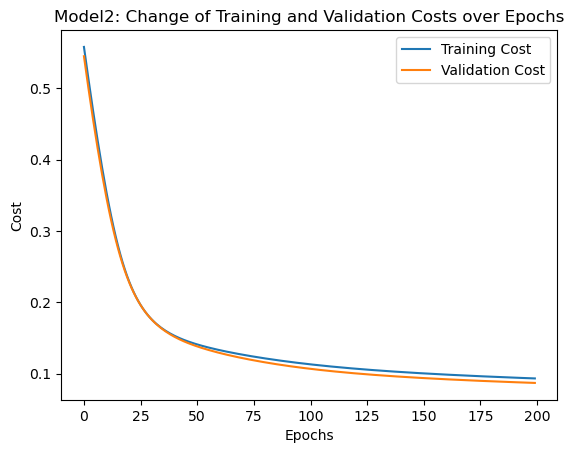

Model 3:
Model values: {'model': [11, 64, 64, 1], 'lr': 0.05, 'alpha': 0.1, 'epoch': 15000, 'threshold': 0.5}


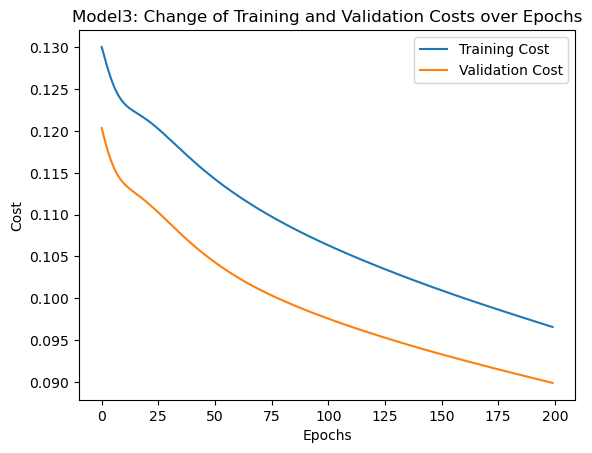

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Define the lists of training and validation costs
for i in range(len(results['layer_cost_train'])):
    print(f"Model {i+1}:")
    print(f"Model values: {results['model_values'][i]}")
    train_costs = results['layer_cost_train'][i]
    val_costs = results['layer_cost_valid'][i]

    # Reshape the arrays to have the same first dimension
    train_costs = np.reshape(train_costs, (-1,))
    val_costs = np.reshape(val_costs, (-1,))

    # Create the x-axis values (epochs) in the interval of 5000
    epoch_range_start=0
    epoch_range_end=200
    epochs = range(epoch_range_start, epoch_range_end, 1)

    # Plot the training and validation costs
    plt.plot(epochs, train_costs[epoch_range_start:epoch_range_end], label='Training Cost')
    plt.plot(epochs, val_costs[epoch_range_start:epoch_range_end], label='Validation Cost')

    # Add labels and title to the plot
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title(f'Model{i+1}: Change of Training and Validation Costs over Epochs')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

Model 1:
Model values: {'model': [11, 64, 64, 1], 'lr': 0.03, 'alpha': 0.1, 'epoch': 15000, 'threshold': 0.5}


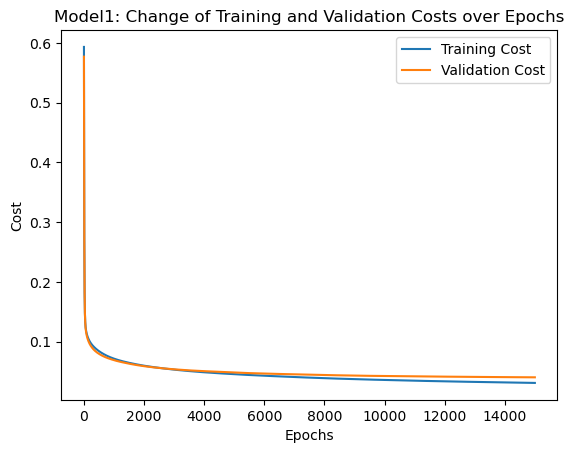

Model 2:
Model values: {'model': [11, 64, 64, 1], 'lr': 0.04, 'alpha': 0.1, 'epoch': 15000, 'threshold': 0.5}


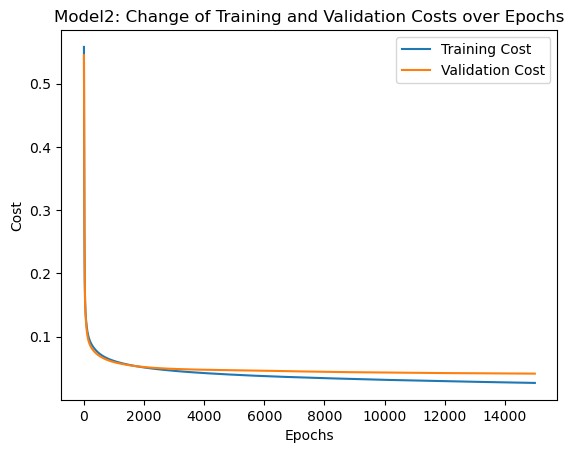

Model 3:
Model values: {'model': [11, 64, 64, 1], 'lr': 0.05, 'alpha': 0.1, 'epoch': 15000, 'threshold': 0.5}


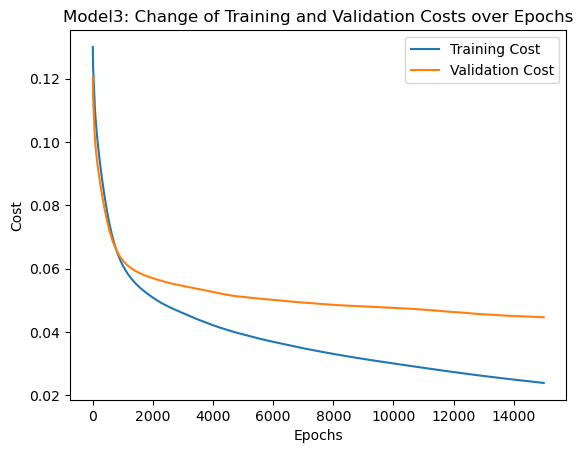

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Define the lists of training and validation costs
for i in range(len(results['layer_cost_train'])):
    print(f"Model {i+1}:")
    print(f"Model values: {results['model_values'][i]}")
    train_costs = results['layer_cost_train'][i]
    val_costs = results['layer_cost_valid'][i]

    # Reshape the arrays to have the same first dimension
    train_costs = np.reshape(train_costs, (-1,))
    val_costs = np.reshape(val_costs, (-1,))

    # Create the x-axis values (epochs) in the interval of 5000
    epoch_range=results['model_values'][i]['epoch']
    epochs = range(epoch_range)

    # Plot the training and validation costs
    plt.plot(epochs, train_costs[:epoch_range], label='Training Cost')
    plt.plot(epochs, val_costs[:epoch_range], label='Validation Cost')

    # Add labels and title to the plot
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title(f'Model{i+1}: Change of Training and Validation Costs over Epochs')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

Threshold: 0.5
F1 score for y_test with W,b: 0.7529411764705882
Threshold: 0.6
F1 score for y_test with W,b: 0.7195121951219512
Threshold: 0.7
F1 score for y_test with W,b: 0.6751592356687898
Threshold: 0.8
F1 score for y_test with W,b: 0.6027397260273972
Threshold: 0.9
F1 score for y_test with W,b: 0.48888888888888893


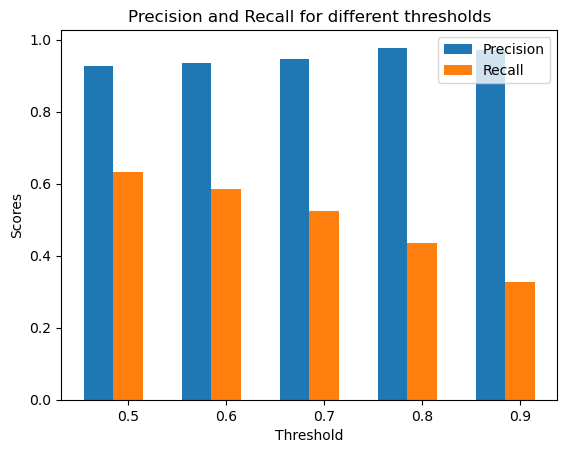

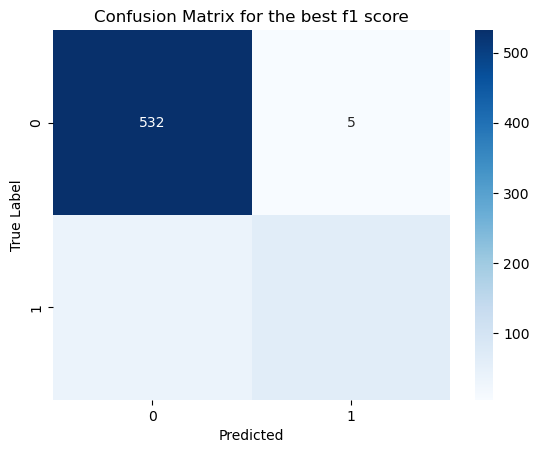

[[532   5]
 [ 37  64]]
Best threshold: 0.5


In [163]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score

def predict(X,W,b,threshold):
    return forward_propagation(X,W,b)[-1]>threshold
precision_scores = []
recall_scores = []

best_f1=-1
threshold_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in threshold_list:
    y_pred = predict(X_test, W_best, b_best, threshold)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Threshold: {threshold}")

    print(f"F1 score for y_test with W,b: {f1_score(y_test, y_pred)}")
    if f1_score(y_test, y_pred) > best_f1:
        best_f1 = f1_score(y_test, y_pred)
        best_threshold = threshold
        best_y_pred = y_pred
        best_cm = cm
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)
    
x = np.arange(len(threshold_list))

# Plot bars

plt.bar(x - 0.3, precision_scores, 0.3, label='Precision')
plt.bar(x, recall_scores, 0.3, label='Recall')


plt.xticks(x, threshold_list)
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Precision and Recall for different thresholds')
plt.legend()

plt.show()

# Plot the confusion matrix using seaborn
sns.heatmap(best_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the best f1 score')
plt.show()
print(best_cm)
print(f"Best threshold: {best_threshold}")


In [164]:
### USE THE MODEL ON THE TEST SET
df_test=pd.read_csv('test.csv')

df_test=total_day_eve_night_grouping(df_test,grouping=feature_engineering)


X_test_output=load_data_test_set(df_test,exclude=exclude_list+['id'],one_hot=one_hot_on,normalize_=normalize_on)

y_pred_output=forward_propagation(X_test_output,W_best,b_best)[-1]

y_pred_output=np.where(y_pred_output>best_threshold, 'yes', 'no')
y_pred_output=y_pred_output.reshape(-1,)
id_column = np.arange(1, y_pred_output.shape[0] + 1)


# Create a DataFrame
df_output = pd.DataFrame({
    'id': id_column,
    'churn': y_pred_output
})


# Save the DataFrame as a CSV file
df_output.to_csv('output_neural_network.csv', index=False)